<a href="https://colab.research.google.com/github/artthuro6/Clasification_dolphin_seahorse/blob/main/Clasification_Dolphins_Seahorse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explanation**

This project will create a model od Deep Learning to clasifier 2 diferente animals:

- Dolphins
- Seahorse

In this project. They will used 64 images of dolphins (Delfines) and 56 images of Seahorse (Caballitos de mar).


All the images were download to Google images. Dolphin and Seahorse.
 

All the images (dolphins and seahorse), were use to train. And we will search images in Instagram using [#dolphin](https://www.instagram.com/explore/tags/dolphins/). To data of test



# **Import Librerires**

In [4]:
# Importando Librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import *
import cv2 as cv
import os
from google.colab import files

# **Load images from Drive**

Cargando las imagenes directamente de mi Google drive.

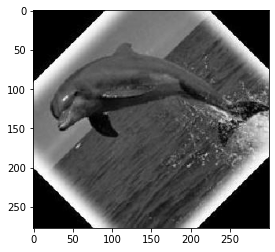

In [7]:
# Cargando las imagenes directamente de google drive

IMAGE_DIR = '/content/drive/MyDrive/IMAGENES/All_images/'

# Nombre de las carpetas con las imagenes (categorias)
CATEGORY = ['dolphin', 'seahorse']

# Imprimiendo las imagenes que se encuentran en cada archivo
for category in CATEGORY:
    path_animal = os.path.join(IMAGE_DIR, category)
    for image in os.listdir(path_animal):
        image_array = cv.imread(os.path.join(path_animal, image), cv.IMREAD_GRAYSCALE)
        plt.imshow(image_array, cmap='gray')
        plt.show()
        break
    break

In [16]:
# Guardando las imagenes de entrenamiento
IMG_SIZE = 50
train = []

for category in CATEGORY:
    path = os.path.join(IMAGE_DIR, category)
    number_class = CATEGORY.index(category)
    for image in os.listdir(path):
        try:
            array_image = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
            new_array = cv.resize(array_image, (IMG_SIZE, IMG_SIZE))
            train.append([new_array, number_class])
        except Exception :
            pass

In [18]:
# Longitud de los datos de entrenamiento
len(train)

121

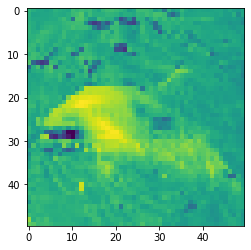

In [19]:
# Plotenado una una imagen randon
plt.imshow(train[randint(1, 120)][0])

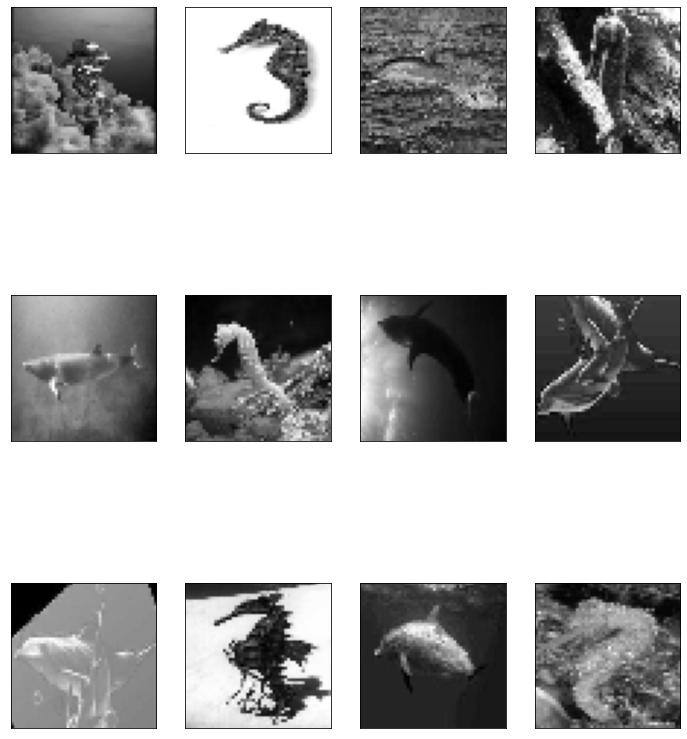

In [21]:
# Plotenado 12 imagenes random
plt.figure(figsize=(12,15))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid([])
    plt.imshow(train[randint(1, 121)][0], cmap=plt.get_cmap('gray'))